<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Assignment 2 Hacktiv8
>Last Updated: 20 Agustus 2022

>Author: Rizky Andri Nurachman

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
%matplotlib inline


In [2]:
# Load your dataset here
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df_nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df_nyc_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df_nyc_sales.shape

(84548, 22)

In [6]:
#cari info kolom
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

>total ada 19 kolom pada dataset

In [7]:
#cek index kolom
df_nyc_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

cek apakah ada nilai null pada dataset

In [8]:
df_nyc_sales.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Let's view Dtype of each features in dataframe using `.info()` function.

In [9]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [10]:
#First, let's check which columns should be categorical
print('Column name')
for col in df_nyc_sales.columns:
    if df_nyc_sales[col].dtype=='object':
        print(col, df_nyc_sales[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


>Setelah mendrop kolom un-named dan ease-ment, terlihat banyak data yang unik, mari kita list apa saja yang unik dari setiap kolom 

In [11]:
for kolom in df_nyc_sales.columns:
    print("UNIQUE VALUES FOR ",kolom)
    print("-"*20)
    print(df_nyc_sales[kolom].unique())
    print("-"*20)

UNIQUE VALUES FOR  Unnamed: 0
--------------------
[    4     5     6 ... 26737 26738 26739]
--------------------
UNIQUE VALUES FOR  BOROUGH
--------------------
[1 2 3 4 5]
--------------------
UNIQUE VALUES FOR  NEIGHBORHOOD
--------------------
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRON

**ANALISIS**
>ternyata masih ada nilai yang tidak bisa diidentifikasi pandas sebagai missing values:
>1. missing values dengan nilai ('') berada pada kolom berikut: TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER
>2. missing values dengan nilai (0) pada kolom berikut: ZIP CODE, YEAR BUILT, TOTAL UNITS
>3. missing values dengan nilai ('-') pada kolom SALE PRICE

Kita definisikan ulang missing values pada parameter pandas read csv

In [12]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

>kemudian untuk point 2 dengan missing values nilai 0 akan diganti dengan nilai nan

In [13]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

### cek apakah masih ada missing values

In [14]:
df_nyc_sales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

>hapus sementara kolom yang tidak diperlukan

>Mari kita hapus kolom Unnamed: 0, EASE-MENT, ADDRESS dan APARTMENT NUMBER

In [28]:
df_nyc_sales.drop(['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER'], inplace=True, axis=1)

In [29]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


In [30]:
#lihat lagi mana data yang masih ada missing value
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [31]:
#review ulang mana kolom kategorik dan numerik
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       83810 non-null  object 
 7   ZIP CODE                        83566 non-null  float64
 8   RESIDENTIAL UNITS               84548 non-null  int64  
 9   COMMERCIAL UNITS                84548 non-null  int64  
 10  TOTAL UNITS                     64786 non-null  float64
 11  LAND SQUARE FEET                58296 non-null  float64
 12  GROSS SQUARE FEET               

>Dari informasi diatas nilai TAX dan BUILDING CLASS AT PRESENT merupakan tipe data object categorical, mari kita isi missing values pada kolom ini dengan nilai modus
>mari kita perbaiki data yang masih dianggap null 

In [32]:
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [33]:
#lihat lagi missing value terbaru
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

## Mengganti sisa kolom yang masih ada missing value

> dari info diatas masih diperlukan pengisian missing value pada 4 kolom, mari kita ubah 2 kolom land dan gross square feet

In [34]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

In [37]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

## Untuk sisa 2 kolom yang masih ada missing values, daripada berspekulasi mari kita putuskan untuk menghapus data yg missing

In [49]:
df_nyc_sales.dropna(inplace=True)

In [50]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ZIP CODE                        52363 non-null  float64
 8   RESIDENTIAL UNITS               52363 non-null  int64  
 9   COMMERCIAL UNITS                52363 non-null  int64  
 10  TOTAL UNITS                     52363 non-null  float64
 11  LAND SQUARE FEET                52363 non-null  float64
 12  GROSS SQUARE FEET               

## Exploratory data analysis

In [51]:
df_nyc_sales.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Mari kita cek apakah data set memiliki nilai duplikat

In [52]:
# check for all duplicates row
df_nyc_sales[
    df_nyc_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


### Terdapat 367 data duplikat. Untuk keabsahan data, mari kita hapus data duplikat

In [53]:
# drop duplicate row
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
# show records after remove duplicates row
df_nyc_sales.shape

(51996, 18)

### OK, sekarang mari kita perbaiki data type kolom agar sesuai dengan tipenya

In [54]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  int64  
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  float64
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

In [55]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [57]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

### Kita ganti nilai numerik pada kolom BOROUGH menjadi nama Wilayah 

In [59]:
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [60]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00


Ubah kolom 'SALE DATE' menjadi tipe datetime serta tambahkan kolom year, month, date, lalu hapus kolom 'SALE DATE'

In [61]:
df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'])
df_nyc_sales['SALE YEAR'] = df_nyc_sales['SALE DATE'].dt.year
df_nyc_sales['SALE MONTH'] = df_nyc_sales['SALE DATE'].dt.month_name()
df_nyc_sales['SALE DATE dt'] = df_nyc_sales['SALE DATE'].dt.day
df_nyc_sales['SALE DAY'] = df_nyc_sales['SALE DATE'].dt.day_name()
df_nyc_sales.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df_nyc_sales.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [63]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday


### Mari perbarui index agar menjadi rapih kembali

In [65]:
df_nyc_sales.index = range(0,len(df_nyc_sales))

In [66]:
df_nyc_sales.shape

(51996, 21)

In [67]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday


### Mari kita lihat dengan fungsi describe apakah ada data outlier

In [69]:
df_nyc_sales.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
count,51996.000000,51996.000000,51996.000000,51996.000000,51996.000000,5.199600e+04,5.199600e+04,5.199600e+04,51996.000000,51996.000000
mean,4514.562255,438.452054,2.479056,0.219382,2.725383,3.225342e+03,3.496165e+03,1.414616e+06,2016.648550,16.470748
std,3534.891748,693.205764,15.783252,10.409406,19.024457,2.597191e+04,2.767995e+04,1.297811e+07,0.477428,8.816077
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016.000000,1.000000
25%,1524.000000,27.000000,1.000000,0.000000,1.000000,1.900000e+03,1.300000e+03,2.500000e+05,2016.000000,9.000000
50%,3944.000000,58.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.722560e+05,2017.000000,17.000000
75%,6544.250000,1018.000000,2.000000,0.000000,2.000000,2.945000e+03,2.400000e+03,9.900000e+05,2017.000000,24.000000
max,16319.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017.000000,31.000000


### ANALISIS

melihat data mean dari kolom seperti residential dan commercial units, nilai min dan max menunjukkan nilai yang ekstrim. Hal ini menunjukkan bahwa terdapat data pencilan / outlier, agar data ini bisa diexclude, mari kita gunakan fungsi kuartil

>Apabila data berada kurang dari (Q1 - IQR x 1,5) atau lebih dari (Q3 + IQR x 1,5) maka data itu disebut sebagai data pencilan

In [70]:
# Hitung kuartile 3 setiap atribut pada data
Q3 = df_nyc_sales.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df_nyc_sales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[
    ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc_sales = df_filtered

/tmp/ipykernel_288/569850398.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)


In [72]:
#melihat kembali apakah describe masih menunjukkan outlier:
df_nyc_sales.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
count,31773.000000,31773.000000,31773.000000,31773.0,31773.000000,31773.000000,31773.000000,3.177300e+04,31773.000000,31773.000000
mean,4949.819155,299.117427,1.524061,0.0,1.535423,2468.019388,1835.175495,5.738354e+05,2016.650678,16.545683
std,3384.703091,504.185760,0.686254,0.0,0.668988,736.489784,632.159394,4.484062e+05,0.476763,8.808107
min,1.000000,1.000000,0.000000,0.0,1.000000,353.000000,0.000000,0.000000e+00,2016.000000,1.000000
25%,1907.000000,25.000000,1.000000,0.0,1.000000,2000.000000,1425.000000,2.800000e+05,2016.000000,9.000000
50%,4682.000000,51.000000,1.000000,0.0,1.000000,2325.000000,1680.000000,5.175000e+05,2017.000000,17.000000
75%,7030.000000,148.000000,2.000000,0.0,2.000000,2700.000000,2132.000000,8.000000e+05,2017.000000,24.000000
max,14074.000000,2501.000000,3.000000,0.0,3.000000,4512.000000,4050.000000,2.100000e+06,2017.000000,31.000000



### ANALISIS
> Setelah meng exclude outlier, data set terlihat lebih masuk akal, mari kita mulai masuk ke rubrik penilaian setelah data siap digunakan


| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |


------------

In [81]:
#refresh ulang dataset kita
df_nyc_sales.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,800000.0,2016,September,7,Wednesday


# Measure of Central Tendency: Mean

In [74]:
#mean dan median sale price
print("Mean SALE PRICE = ", df_nyc_sales['SALE PRICE'].mean())
print("Median SALE PRICE = ",df_nyc_sales['SALE PRICE'].median())

Mean SALE PRICE =  573835.3769552765
Median SALE PRICE =  517500.0


### ANALISIS

>Berdasarkan nilai Median yang lebih kecil dari Mean, menandakan bahwa terjadi distribusi yang tidak normal dimana data lebih berada kekanan

# Measure of Central Tendency: Median

In [75]:
# GROSS SQUARE FEET
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())

Median GROSS SQUARE FEET =  1680.0
Mean GROSS SQUARE FEET =  1835.175494917068


In [76]:
# LAND SQUARE FEET
print("Median LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].median())
print("Mean LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].mean())

Median LAND SQUARE FEET =  2325.0
Mean LAND SQUARE FEET =  2468.019387530293


# Measure of Central Tendency: Modus

In [79]:
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus kolom "+col+" = ",df_nyc_sales[col].mode()[0])

Modus kolom BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus kolom BUILDING CLASS AT PRESENT =  R4
Modus kolom BUILDING CLASS AT TIME OF SALE =  R4


# Measure of Spread: Range

range adalah selisih nilai maksimum dan minimum, mari kita hitung range sale price dan gross square feet

In [82]:
print('Range GROSS SQUARE FEET adalah= ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))
print('Range SALE PRICE adalah = ', (df_nyc_sales['SALE PRICE'].max() - df_nyc_sales['SALE PRICE'].min()))

Range GROSS SQUARE FEET adalah=  4050.0
Range SALE PRICE adalah =  2100000.0


# Measure of Spread: Variance

In [83]:
print('Sampel Variance dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))
print('Sampel Variance dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1))

Sampel Variance dari GROSS SQUARE FEET =  399625.49966764264
Sampel Variance dari SALE PRICE =  201068107779.60077


# Measure of Spread: Standard Deviation

In [84]:
print('Sampel Standard Deviation dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1)**0.5)

Sampel Standard Deviation dari GROSS SQUARE FEET =  632.1593941939348
Sampel Standard Deviation dari SALE PRICE =  448406.18615224387


# Probability Distribution

## Normal Distribution
> mari kita lihat distribusi normal dari gross square feet

Text(0, 0.5, 'Frekuensi')

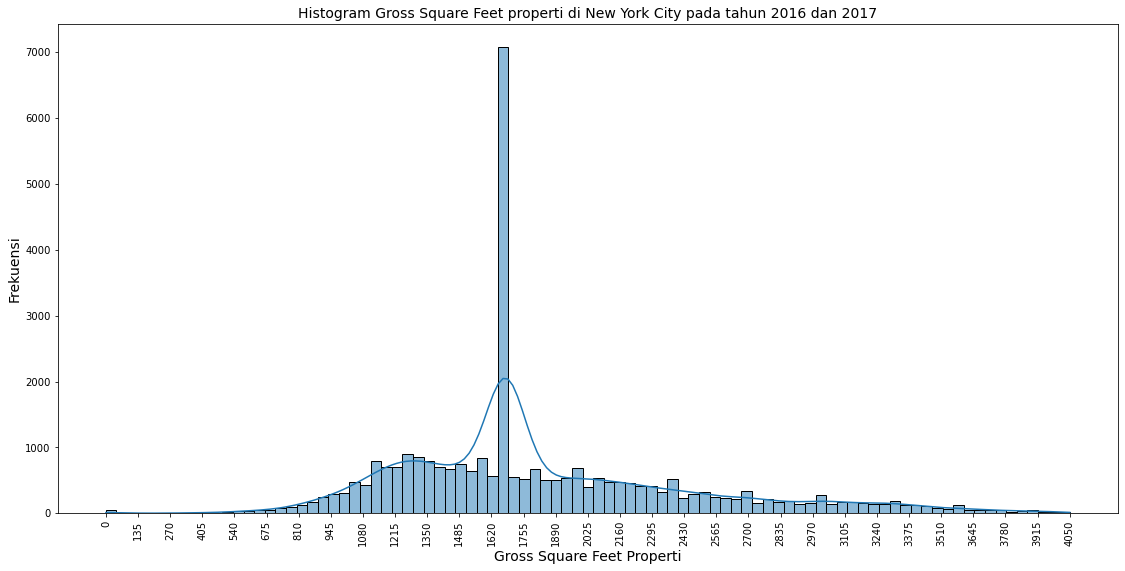

In [85]:
df_gross_square_feet = df_nyc_sales['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet,bins=30)
sns.histplot(df_gross_square_feet,kde=True, ax=ax)
ax.set_title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
ax.set_xlabel('Gross Square Feet Properti', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

>terlihat bahwa distribusi datapada  gross square feet belum normal

> Untuk membuat distribusi normal mari lakukan central limit theorem

In [86]:
#ambil 1000 sample dari 100 nilai acak
n = 100
m = 1000
sample_mean_gross_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a=df_gross_square_feet,size=n)
    sample_mean_gross_square_feet.append(np.mean(sample_values))

Text(0, 0.5, 'Frekuensi')

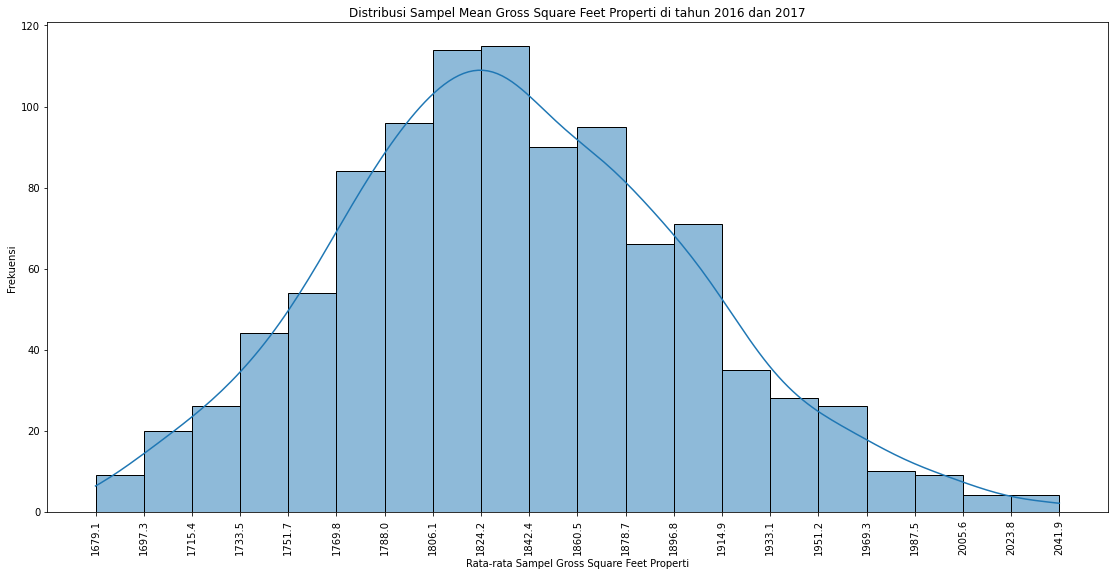

In [87]:
count, bin_edges = np.histogram(sample_mean_gross_square_feet, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_gross_square_feet,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Gross Square Feet Properti di tahun 2016 dan 2017')
ax.set_xlabel('Rata-rata Sampel Gross Square Feet Properti')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

## ANALISIS
>Distribusi dari sample mean sudah normal

> berapakah nilai mean, median dan SD dari sample mean diatas?

In [88]:
sample_means_series = pd.Series(sample_mean_gross_square_feet)

# hitung nilai rata-rata
print('Rata rata sampel mean GROSS SQUARE FEET = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean GROSS SQUARE FEET = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean GROSS SQUARE FEET = ', sample_means_series.std())

Rata rata sampel mean GROSS SQUARE FEET =  1836.70309
Median sampel mean GROSS SQUARE FEET =  1833.585
Standar Deviasi sampel mean GROSS SQUARE FEET =  66.32154107952456


### Berapakah nilai SE (Standard Error) dari sample mean ?

In [90]:
# hitung rata-rata dan standar deviasi populasi
pop_std_gross_square = df_gross_square_feet.std()
pop_mean_gross_square = df_gross_square_feet.mean()

# Menghitung jumlah seluruh populasi
number_of_observation = len(df_gross_square_feet)

# Menghitung standar error
standard_error_of_sampel_mean_gross_feet = pop_std_gross_square/np.sqrt(number_of_observation)
standard_error_of_sampel_mean_gross_feet

3.546479752860325



### Menghitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi (z_score = 1.96)

In [91]:
z_score = 1.96
lower_bound_gross_square = np.mean(sample_mean_gross_square_feet) - z_score*standard_error_of_sampel_mean_gross_feet
upper_bound_gross_square = np.mean(sample_mean_gross_square_feet) + z_score*standard_error_of_sampel_mean_gross_feet
lower_bound_gross_square, upper_bound_gross_square

(1829.7519896843937, 1843.6541903156062)

Text(0.5, 0, 'Sampel Mean Gross Square Feet of New York City Properties')

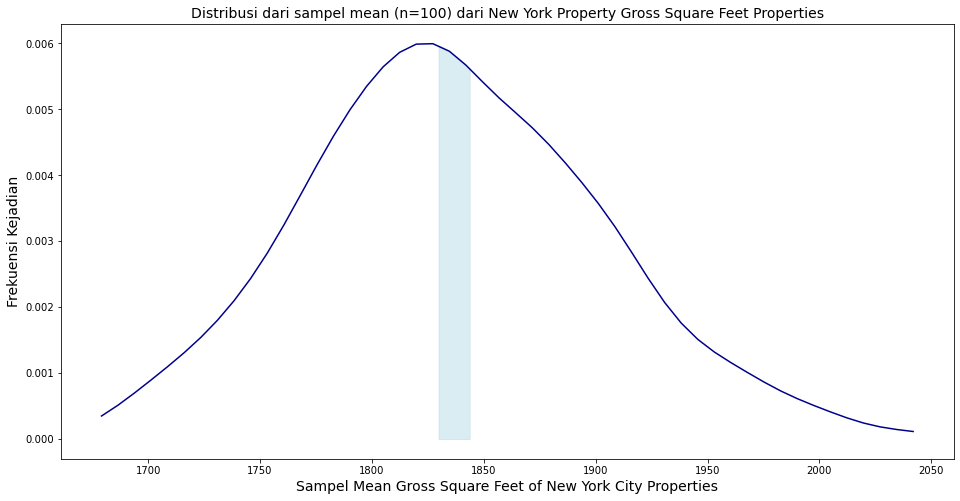

In [92]:
plt.figure(figsize=(16,8))
kde = scistats.gaussian_kde(sample_mean_gross_square_feet)
pos = np.linspace(np.min(sample_mean_gross_square_feet), np.max(sample_mean_gross_square_feet))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound_gross_square,upper_bound_gross_square)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Gross Square Feet Properties', fontsize=14)
plt.ylabel('Frekuensi Kejadian', fontsize=14)
plt.xlabel('Sampel Mean Gross Square Feet of New York City Properties',fontsize=14)

### Analisis
95% data sample mean dari Gross square feet berada pada wilayah arsiran biru dalam rentang +- z score 1.96 dari nilai rata2. 

# Confidence Interval

Hal ini berarti nilai rata2 dari luas total semua lantai bangunan properti di NYC 2016-2017 ada di rentang Confidence Interval antara 1829.7519896843937 - 1843.6541903156062

# Hypothesis Testing

>Apakah rata-rata harga jual bangunan di New York City pada tahun 2017 berbeda secara signifikan dari rata-rata harga jual bangunan di New York City pada tahun 2016?

# Hipotesis null dan alternatif

> Pertama2 kita tentukan apakah hipotesis null dan hipotesis alternatif dari hypothesis testing diatas.

Harga jual bangunan NYC 2016 = miu1

Harga jual bangunan NYC 2017 = miu2

H0 > miu1 = miu2

Ha > miu1 != miu2


# Level signifikansi

> jika p value > alpha maka H0

> jika p value <= alpha maka tolak H0

### menghitung jumlah data penjualan periode 2016-2017

In [96]:
# mengambil data penjualan (SALE PRICE) untuk tahun 2016
sales_2016 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2016)
]['SALE PRICE']

# mengambil data penjualan (SALE PRICE) untuk tahun 2017
sales_2017 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2017)
]['SALE PRICE']

# menghitung banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)

(11099, 20674)

Text(0, 0.5, 'Frekuensi')

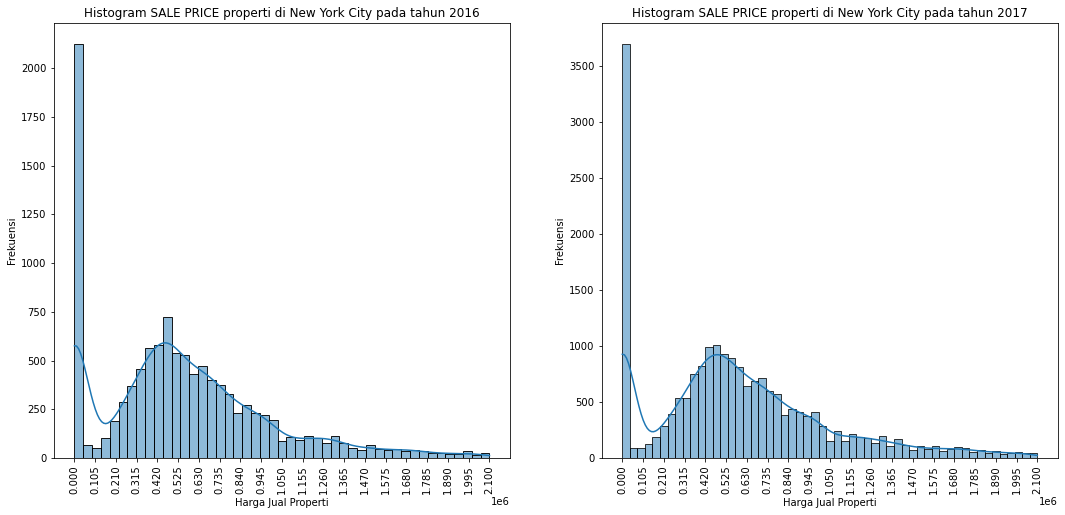

In [97]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sales_2016,bins=20)
sns.histplot(sales_2016,kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sales_2017,bins=20)
sns.histplot(sales_2017, kde=True, ax=ax0)
ax0.set_title('Histogram SALE PRICE properti di New York City pada tahun 2017')
ax0.set_xlabel('Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

> Lakukan implementasi central limit theorem agar data terdistribusi normal

In [98]:
sample_means_2016 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2016, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2016.append(sample_mean)

sample_means_2017 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2017, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2017.append(sample_mean)

Text(0, 0.5, 'Frekuensi')

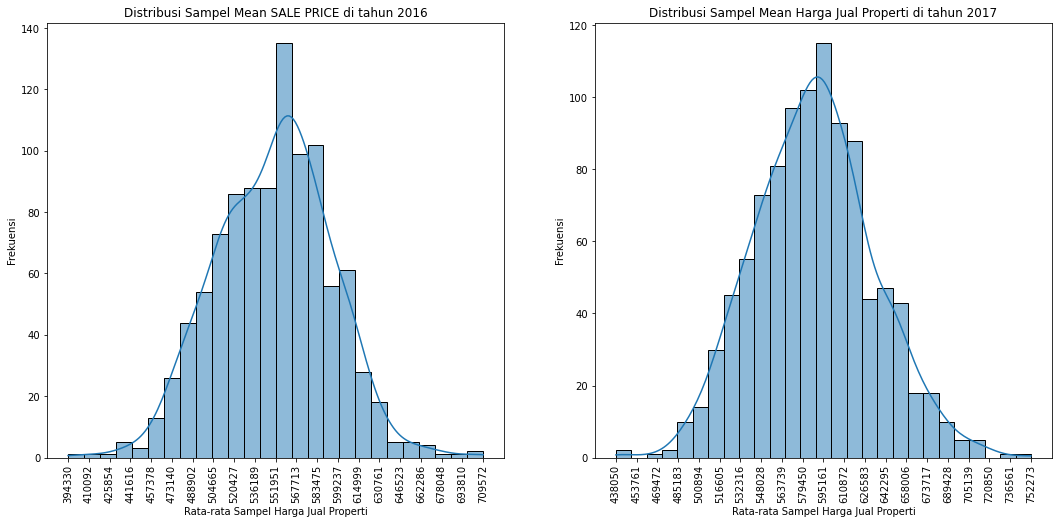

In [99]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sample_means_2016,bins=20)
sns.histplot(sample_means_2016, kde=True, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016')
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sample_means_2017,bins=20)
sns.histplot(sample_means_2017, kde=True, ax=ax0)
ax0.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2017')
ax0.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

In [100]:
import statsmodels.api as sm

In [101]:
z_score, pvalue = sm.stats.ztest(sample_means_2016,sample_means_2017,alternative='two-sided')

In [102]:
pvalue

2.493526205000318e-80

In [103]:
if pvalue > 0.05:
    print("H0 diterima")
else:
    print("Ha diterima")

Ha diterima


# HIPOTESIS TESTING ANALISIS
> Nilai P value sebesar 2.493526205000318e-80 sangat kecil dibandingkan alpha, sesuai dengan level signifikansi maka **hipotesis null bisa ditolak** dimana harga 2016 sama dengan 2017, nyatanya **terdapat perbedaan yang signifikan pada rata2 penjualan properti NYC tahun 2016 dan 2017**

# OVERALL ANALYSIS

1. 95% data sample mean dari Gross square feet berada pada wilayah arsiran biru dalam rentang +- z score 1.96 dari nilai rata2. Hal ini berarti nilai rata2 dari luas total semua lantai bangunan properti di NYC 2016-2017 ada di rentang Confidence Interval antara 1829.7519896843937 - 1843.6541903156062

2. terdapat perbedaan yang signifikan pada rata2 penjualan properti NYC tahun 2016 dan 2017 dengan alpha sebesar 0.05